In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the CIFAR-10 dataset
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalize the pixel values of images to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Split the training data into training and validation sets (20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Print some information about the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 10


In [ ]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Define image height and width based on CIFAR-10 dimensions
img_height, img_width = 32, 32

In [ ]:
# Convert the labels to categorical (if necessary)
y_train = to_categorical(y_train.reshape(-1), 10)
y_val = to_categorical(y_val.reshape(-1), 10)
y_test = to_categorical(y_test.reshape(-1), 10)

In [ ]:
# Re-calculate the class distribution for the original labels (before one-hot encoding)
# Convert the labels to class indices if needed
y_train_classes = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train.flatten()
y_val_classes = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val.flatten()
y_test_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test.flatten()

# Calculate class distribution
train_class_counts = np.bincount(y_train_classes, minlength=10)
val_class_counts = np.bincount(y_val_classes, minlength=10)
test_class_counts = np.bincount(y_test_classes, minlength=10)

# Display the class distribution
print("\nClass Distribution:")
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Train: {train_class_counts[i]}, Validation: {val_class_counts[i]}, Test: {test_class_counts[i]}")



Class Distribution:
airplane - Train: 4027, Validation: 973, Test: 1000
automobile - Train: 4021, Validation: 979, Test: 1000
bird - Train: 3970, Validation: 1030, Test: 1000
cat - Train: 3977, Validation: 1023, Test: 1000
deer - Train: 4067, Validation: 933, Test: 1000
dog - Train: 3985, Validation: 1015, Test: 1000
frog - Train: 4004, Validation: 996, Test: 1000
horse - Train: 4006, Validation: 994, Test: 1000
ship - Train: 3983, Validation: 1017, Test: 1000
truck - Train: 3960, Validation: 1040, Test: 1000


In [ ]:
# Create a Sequential model
resnet_model = Sequential()

In [ ]:
# Load the pre-trained ResNet50 model without the top layer (include_top=False)
# Modify the input_shape to match the CIFAR-10 dataset (32x32x3)
pretrained_model = ResNet50(include_top=False,
                            input_shape=(img_height, img_width, 3),  # CIFAR-10 image shape
                            pooling='avg',
                            weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Unfreeze all layers of the pre-trained model to fine-tune on CIFAR-10
for layer in pretrained_model.layers:
    layer.trainable = True

In [ ]:
# Add the pre-trained model to the Sequential model
resnet_model.add(pretrained_model)

In [ ]:
# Add Flatten layer
resnet_model.add(Flatten())

In [ ]:
# Add Dense layers
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))  # 10 classes in CIFAR-10

In [ ]:
# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 20
history = resnet_model.fit(X_train, y_train,
                           validation_data=(X_val, y_val),
                           epochs=epochs)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 106s 40ms/step - accuracy: 0.4421 - loss: 1.6787 - val_accuracy: 0.7063 - val_loss: 0.8787
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.7252 - loss: 0.7986 - val_accuracy: 0.7499 - val_loss: 0.7372
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.7963 - loss: 0.5939 - val_accuracy: 0.7640 - val_loss: 0.7164
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8443 - loss: 0.4586 - val_accuracy: 0.7841 - val_loss: 0.6880
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.8847 - loss: 0.3451 - val_accuracy: 0.7899 - val_loss: 0.7048
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9110 - loss: 0.2665 - val_accuracy: 0.7993 - val_loss: 0.6763
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9319 - loss: 0.2025 - val_accuracy: 0.8057 - val_loss: 0.7071
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9462 

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = resnet_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8038 - loss: 0.9313
Test accuracy: 0.8062999844551086


In [ ]:
# Print the model summary
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (32, 2048)                  │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2048)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 512)                   │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,819,552 (281.60 MB)

 Trainable params: 24,588,810 (93.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 49,177,622 (187.60 MB)

In [ ]:
# Get the best training and validation accuracy
best_train_accuracy = max(history.history['accuracy'])
best_val_accuracy = max(history.history['val_accuracy'])

# Get the lowest training and validation loss
lowest_train_loss = min(history.history['loss'])
lowest_val_loss = min(history.history['val_loss'])

print(f"Best Training Accuracy: {best_train_accuracy * 100:.2f}%")
print(f"Best Validation Accuracy: {best_val_accuracy * 100:.2f}%")
print(f"Lowest Training Loss: {lowest_train_loss:.4f}")
print(f"Lowest Validation Loss: {lowest_val_loss:.4f}")

Best Training Accuracy: 97.97%
Best Validation Accuracy: 81.56%
Lowest Training Loss: 0.0624
Lowest Validation Loss: 0.6763


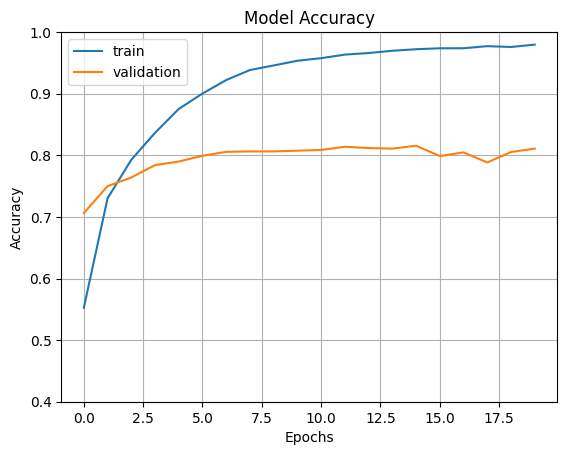

In [ ]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

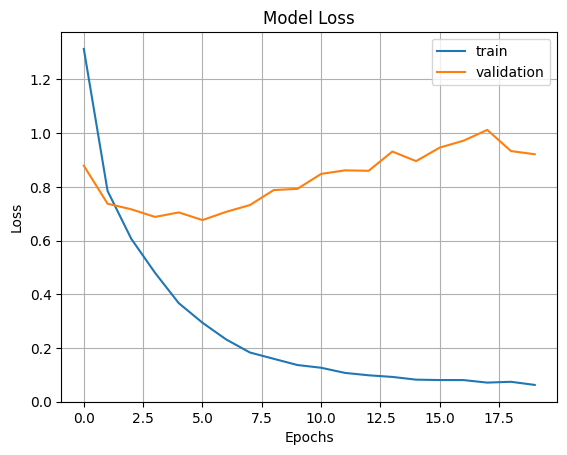

In [ ]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Evaluate model performance on the test set
y_pred = resnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class indices

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


In [ ]:
# Display the classification report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

    airplane       0.83      0.84      0.83      1000
  automobile       0.88      0.89      0.88      1000
        bird       0.80      0.73      0.76      1000
         cat       0.63      0.71      0.67      1000
        deer       0.78      0.81      0.79      1000
         dog       0.78      0.63      0.70      1000
        frog       0.87      0.83      0.85      1000
       horse       0.84      0.84      0.84      1000
        ship       0.85      0.91      0.87      1000
       truck       0.84      0.88      0.86      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [ ]:
# Calculate and display success rate for each class
print("\nSuccess Rate for Each Class:")
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
for i, class_name in enumerate(class_names):
    true_positive = conf_matrix[i, i]  # Correct predictions for this class
    total_actual = np.sum(conf_matrix[i, :])  # Total instances of this class in the test set
    success_rate = true_positive / total_actual * 100  # Calculate success rate
    print(f"{class_name}: {true_positive}/{total_actual} ({success_rate:.2f}%)")


Success Rate for Each Class:
airplane: 840/1000 (84.00%)
automobile: 891/1000 (89.10%)
bird: 732/1000 (73.20%)
cat: 706/1000 (70.60%)
deer: 810/1000 (81.00%)
dog: 627/1000 (62.70%)
frog: 833/1000 (83.30%)
horse: 836/1000 (83.60%)
ship: 906/1000 (90.60%)
truck: 882/1000 (88.20%)
